In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [34]:
dfr = pd.read_excel(r'C:\Users\Samsung\Downloads\Fluxos Concatenados - Geral.xlsx',sheet_name='Planilha2')

In [29]:
dfa = pd.read_excel(r'C:\Users\Samsung\Downloads\Fluxos Concatenados - Geral.xlsx',sheet_name='Planilha3')
dfb = pd.read_excel(r'C:\Users\Samsung\Downloads\Fluxos Concatenados - Geral.xlsx',sheet_name='Planilha4')
dfc = pd.read_excel(r'C:\Users\Samsung\Downloads\Fluxos Concatenados - Geral.xlsx',sheet_name='Planilha5')

In [35]:
dfr.head()

,ângulo,a,b,c,r
0,0,-0.215533,-0.209705,0.503539,-0.519084
1,10,-0.215578,-0.209829,0.503721,-0.664625
2,20,-0.216404,-0.209971,0.503779,-0.793071
3,30,-0.216231,-0.211139,0.503972,-0.896937
4,40,-0.216341,-0.213305,0.503663,-0.971250


In [66]:
#fluxo = L*i --> L = fluxo/i --> corrente no rotor de 2A; 
#tabela R --> corrente no rotor 
ir = 2 
lr = dfr['rotor ']/ir #indutância prórpia do rotor
# tabela A --> corrente no estator A de 8A
i = 8 
la = dfa['a']/i
#tabela B --> corrente no estator B de 8A
lb = dfb['b']/i
#tabela C --> corrente no estator C de 8A 
lc = dfc['c']/i 
l = lc
# tenho os valores de indutância própria: lr, la = lb = lc = l 
#o objetivo agora é achar as expressões dos valores das indutâncias mútuas: lar,lbr e lcr.
# as indutâncias mútuas: lab,lbc e lca são equivalentes = -me
# descobrindo l 
#tabela A 

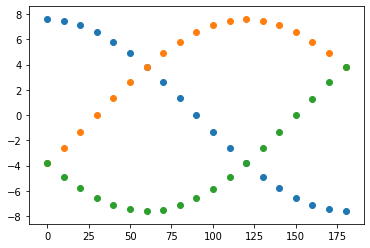

In [81]:
lba = dfa['b']/i 
l = lba 
g = 1*10**-3
r = 9.9*10**-2
h = 15*10**-2
a = 2*3.14*r*h
ne = 72
nr = 180
rg = g/(4*(3.14*10e-7)*a)
angulo = dfr['angulo']*(3.14/180)
mer = ne*nr/(2*rg)
cossenoa = np.cos(angulo)
cossenob = np.cos(angulo - (2/3)*3.14)
cossenoc = np.cos(angulo + (2/3)*3.14)
lar = mer*cossenoa 
lbr = mer*cossenob
lcr = mer*cossenoc
plt.scatter(dfr['angulo'],lar)
plt.scatter(dfr['angulo'],lbr)
plt.scatter(dfr['angulo'],lcr)

equação dada por: lar = 7.5901567104000005 *cos(x + -6.283185307179586 )


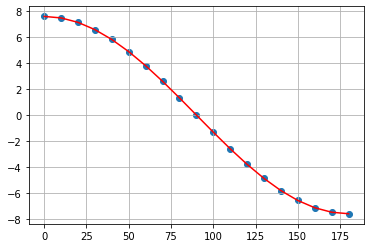

In [118]:
import math
from scipy.optimize import curve_fit
def func(x, t, b): 
    return t*np.cos(x + b)
params = curve_fit(func, angulo, lar)
[t,b] = params[0]
f = t*np.cos(angulo + b)
print('equação dada por: lar =',t,'*cos(x +',b,')')
plt.grid()
plt.scatter(dfr['angulo'],lar)
plt.plot(dfr['angulo'],f, color = 'red')

equação dada por: lbr = -7.5901567104000005 *cos(x + 1.0482593202564598 )


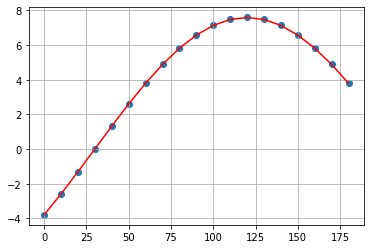

In [127]:
import math
from scipy.optimize import curve_fit
def func(x, t, b): 
    return t*np.cos(x + b)
params = curve_fit(func, angulo, lbr)
[t,b] = params[0]
f = t*np.cos(angulo + b)
print('equação dada por: lbr =',t,'*cos(x +',b,')')
plt.grid()
plt.scatter(dfr['angulo'],lbr)
plt.plot(dfr['angulo'],f, color = 'red')

equação dada por: lbr = 7.59015671039997 *cos(x + 8.37651864051292 )


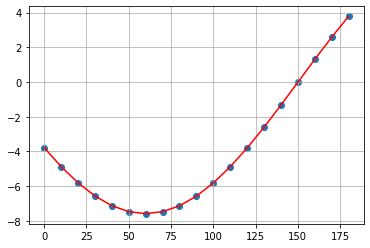

In [130]:
import math
from scipy.optimize import curve_fit
def func(x, t, b): 
    return t*np.cos(x + b)
params = curve_fit(func, angulo, lcr)
[t,b] = params[0]
f = t*np.cos(angulo + b)
print('equação dada por: lbr =',t,'*cos(x +',b,')')
plt.grid()
plt.scatter(dfr['angulo'],lcr)
plt.plot(dfr['angulo'],f, color = 'red')